<center>&copy; | Ghassen <strong>MARRAKCHI</strong> - 2022</center>

<img src="../__src/Institut_Galilee.png" style="">
<hr>

<h1 style="text-align:center;color:#5a84ba"><center>Méthodes Matricielles pour le Data Mining</center></h1>
<h2><center><strong><font color='#3f4a4f'>Factorisation Matricielle Non-Négative pour
le Text Mining
</font></strong></center></h2>

<hr>
<h3><center><strong><font color='#3f4a4f'>III- Clustering simple</font></strong></center></h3>
<hr>

<h4><strong><font color='#353b38'>Plan de Travail</font></strong></h4>

<ol style="list-style-type: upper-roman;">
    <li><a href="./I-Introduction.ipynb">Introduction</a></li>
    <li><a href="./II-Pré-traitemnt du dataset.ipynb">Pré-traitemnt du dataset</a></li>
    <li><strong>Clustering simple</strong></li>
    <li><a href="./IV-NMF.ipynb">NMF</a></li>
    <li><a href="./V-Orthogonal NMF.ipynb">Orthogonal NMF</a></li>
    <li><a href="./VI-Symmetric NMF.ipynb">Symmetric NMF</a></li>
    <li><a href="./VII-Conclusion.ipynb">Conclusion</a></li>
</ol>

<hr>
<h4><strong><font color='#353b38'>Objectif</font></strong></h4>

- Décomposer le dataset.
- Effectuer un clustering sans utiliser la technique de NMF.

<h4><strong><font color='#353b38'>Configuration générale du notebook</font></strong></h4>

In [1]:
# Packages Importation
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations
from math import ceil

In [2]:
# Files paths


## PLOTS 2D
III_SIMPLE_CLUST_2D_K_PLUS_FREQ_PNG = os.path.join('..', 'plots', 'III-Clustering_simple', 'k_plus_freq_2D.png')
III_SIMPLE_CLUST_2D_K_PLUS_FREQ_JPG = os.path.join('..', 'plots', 'III-Clustering_simple', 'k_plus_freq_2D.jpg')
III_SIMPLE_CLUST_2D_K_PLUS_FREQ_PDF = os.path.join('..', 'plots', 'III-Clustering_simple', 'k_plus_freq_2D.pdf')


## PLOTS 3D
III_SIMPLE_CLUST_3D_K_PLUS_FREQ_PNG = os.path.join('..', 'plots', 'III-Clustering_simple', 'k_plus_freq_3D.png')
III_SIMPLE_CLUST_3D_K_PLUS_FREQ_JPG = os.path.join('..', 'plots', 'III-Clustering_simple', 'k_plus_freq_3D.jpg')
III_SIMPLE_CLUST_3D_K_PLUS_FREQ_PDF = os.path.join('..', 'plots', 'III-Clustering_simple', 'k_plus_freq_3D.pdf')


## PRE-TRAITEMENT
PRE_TRAIT_MAT_TF_IDF_FILE = os.path.join('..', 'dataset', 'II-pre-traite', 'data_tf-idf.csv')
PRE_TRAIT_LAB_FILE        = os.path.join('..', 'dataset', 'II-pre-traite', 'label.csv')
PRE_TRAIT_TER_FILE        = os.path.join('..', 'dataset', 'II-pre-traite', 'terms.csv')


## CLUSTERING-SIMPLE
CLUST_SIMP_REUTERS_4 = os.path.join('..', 'dataset', 'III-Clustering_simple', 'reuters_4.csv')
CLUST_SIMP_LABELS_4  = os.path.join('..', 'dataset', 'III-Clustering_simple', 'label_4.csv')

CLUST_SIMP_REUT_TRAIN = os.path.join('..', 'dataset', 'III-Clustering_simple', 'reut_train.csv')
CLUST_SIMP_LABELS_TRAIN  = os.path.join('..', 'dataset', 'III-Clustering_simple', 'labels_train.csv')

CLUST_SIMP_REUT_TEST = os.path.join('..', 'dataset', 'III-Clustering_simple', 'reut_test.csv')
CLUST_SIMP_LABELS_TEST  = os.path.join('..', 'dataset', 'III-Clustering_simple', 'labels_test.csv')

CLUST_SIMP_REUTERS_MAX_3 = os.path.join('..', 'dataset', 'III-Clustering_simple', 'reut_max_3.csv')

<h4><strong><font color='#353b38'>Implémentation des fonctions</font></strong></h4>

<h5 id="print_numpy_array_infos">print_numpy_array_infos</h5>

In [3]:
def print_numpy_array_infos(array, name) :
    """ Prints numpy array informations.
    
    Parameters
    ----------
    array : numpy.ndarray
        The array to print its informations
    name : str
        The name to be used for a formatted printing
    """
    
    print("ARRAY : ", name)
    print("--- Type               : ", type(array))
    print("--- Dimensions         : ", array.shape)
    print("--- Nombre de lignes   : ", array.shape[0])
    print("--- Nombre de colonnes : ", array.shape[1])
    print("--- Nombre totale des données décrites dans le dataset : ", array.size)
    print("--- Type des données : ", array.dtype)

    print("\n")

    print("AFFICHAGE (partie) : \n", array[:5,:])

<h5 id="split_n_from_p_classes">split_n_from_p_classes</h5>

In [4]:
def split_n_from_p_classes(data, labels, nb_lignes, nb_classes) :
    """ Creates new dataset of the first p classes containing each n elements.
    
    On ne prendra en considération ni l'inexsitence des p classes ni la conteance de ces dernières de n élements.
    
    Parameters
    ----------
    data : numpy.ndarray
        The data part of the dataset
    labels : numpy.ndarray
        The data part of the dataset
    nb_lignes : numpy.ndarray
        Number of elements within each class
    nb_classes : int
        Number of classes to be choosen
    
    Returns
    -------
    final_data : numpy.ndarray
        The data.
    final_labels : numpy.array
        1-d array of labels
    """
    
    # Affichage
    print("--------------------------------")
    print("---- Nombre de classes : ", nb_classes)
    print("---- Nombre d'élements dans une classe : ", nb_lignes)
    
    # Connaitre les classes
    classes = []
    i = 0
    while (i < labels.shape[0]) and (len(classes) != nb_classes) :
        if not (labels[i, 0] in classes) :
            classes.append(labels[i, 0])
        
        i += 1
    
    print("---- classes prises :", classes)
    
    
    # Fusionner données et labels
    total =  np.concatenate((data, labels), axis=1)
    
    # Réceptionner les élements des classes
    final_total = []
    for classe in classes :
        inter_total = total[total[:, data.shape[1]] == classe][:nb_lignes,:]
        final_total.append(inter_total)
    
    # Total filtré
    final_total = np.concatenate(final_total, axis=0)
    
    # Partage des informations
    final_data = final_total[:,:data.shape[1]]
    final_labels = final_total[:,-1]
    
    print("---- Dimensions des données : ", final_data.shape)
    print("---- Dimensions des labels : ", final_labels.shape)
    print("--------------------------------")
    
    return final_data, final_labels.reshape(final_labels.shape[0], 1)

Nou avons utilisé une boucle et pas un ensemble pour garder l'ordre des élements 

<h5 id="k_plus_freq">k_plus_freq</h5>

In [5]:
def k_plus_freq(data, terms, k) :
    """ Choisis les termes les plus fréquents dans les colonnes
    
    Nous allons faciliter la tache en utilisant le fichiers terms.csv.
    
    Parameters
    ----------
    data : numpy.ndarray
        Le dataset
    terms : numpy.ndarray
        La liste des termes
    k : int
        nombre de termes à garder
    """
    
    # Affichage
    print("--------------------------------")
    print("---- Nombre de temres : ", k)
    
    # Initialisation
    inter_terms = terms
    terms_list = []
    
    # Reception
    for i in range(k) :
        # determination du max 
        index_max = np.argmax(np.max(terms[:, 2]))
        
        # accès à la valeur directe de l'indice
        index_max = inter_terms[index_max, 0]
        
        # Reception des documents pour ce terme
        terms_list.append(data[:, index_max])
        
        # Supression pour la prochaine itération
        inter_terms = np.delete(inter_terms, index_max, 0)
        
    
    # Rassemblement du dataset résultant
    result = np.vstack(terms_list)
    

    return np.transpose(result)

On a féjà vérifié que l'indexation du dataset coincide parfaitement avec celle des termes.

<h5 id="plot_clusters3D">plot_clusters3D</h5>

In [6]:
def plot_clusters3D(data, label, path) :
    """ plot the clusters
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    label : numpy.array
        1-D vector
    path : os.path
        path of the figure to be saved in
    """
    
    # Affichage
    print("------------------------------------------------------- ")
    print("---- plot clusters ")
    print("------------------------------------------------------- ")
    
    # set up plot
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    fig.suptitle('Clustering Simple visualized in 3D', fontsize=16)
    fig.tight_layout()
    
    # Plot
    ax.scatter3D(data[:,0], data[:,1], data[:,2], c=label, cmap='cool')
    plt.title("Clustering simple (Avec MAX)")
    
    #show the plot
    plt.show()

    # Enregistrement des figures
    fig.savefig(path)

<h5 id="plot_clusters2D">plot_clusters2D</h5>

In [7]:
def plot_clusters2D(data, label, path) :
    """ plot the clusters
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    label : numpy.array
        1-D vector
    path : os.path
        path of the figure to be saved in
    """
    
    # Affichage
    print("------------------------------------------------------- ")
    print("---- plot clusters ")
    print("------------------------------------------------------- ")
    
    # Combinaison
    attributes = [i for i in range(data.shape[1])]
    combis = list(combinations(attributes, 2)) 
    number_combi = len(combis)
    number_ligne = ceil(number_combi/2)
    number_colon = 2
    
    # set up plot
    fig, axs = plt.subplots(number_ligne, number_colon, sharex=False, sharey=False)
    fig.suptitle('Clustering Simple visualized in 2D', fontsize=16)
    fig.tight_layout()
    
    # Subplots
    for i in range(number_combi) :
        colonne = i%2
        ligne = i//2
        axs[ligne, colonne].scatter(data[:,combis[i][0]], data[:,combis[i][1]], c=label, cmap='Dark2')    
        axs[ligne, colonne].set_title("Terms ({0}, {1})".format(combis[i][0], combis[i][1]))
    
    #show the plot
    plt.show()
    
    # Enregistrement des figures
    fig.savefig(path)

On va donner à cette fonction les données dans les bonnes dimensions. Nous afficerons toutes les combinaisons possibles.

<h4><strong><font color='#353b38'>Récupération des données</font></strong></h4>

<h5>reuters_terms</h5>

In [8]:
reuters_terms = pd.read_csv(PRE_TRAIT_TER_FILE).to_numpy()
print_numpy_array_infos(reuters_terms, "reuters_terms")

ARRAY :  reuters_terms
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (18933, 3)
--- Nombre de lignes   :  18933
--- Nombre de colonnes :  3
--- Nombre totale des données décrites dans le dataset :  56799
--- Type des données :  object


AFFICHAGE (partie) : 
 [[0 'reuter' 8228]
 [1 'mln' 4090]
 [2 'dlrs' 3515]
 [3 'cts' 2928]
 [4 'vs' 2826]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

<h5>reuters_labels</h5>

In [9]:
reuters_labels = pd.read_csv(PRE_TRAIT_LAB_FILE).to_numpy()
print_numpy_array_infos(reuters_labels, "reuters_labels")

ARRAY :  reuters_labels
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (8293, 1)
--- Nombre de lignes   :  8293
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  8293
--- Type des données :  int64


AFFICHAGE (partie) : 
 [[1]
 [1]
 [1]
 [1]
 [1]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

<h5>reuters_data</h5>

In [10]:
reuters_data = pd.read_csv(PRE_TRAIT_MAT_TF_IDF_FILE).to_numpy()
print_numpy_array_infos(reuters_data, "reuters_data")

ARRAY :  reuters_data
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (8293, 18933)
--- Nombre de lignes   :  8293
--- Nombre de colonnes :  18933
--- Nombre totale des données décrites dans le dataset :  157011369
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[0.0237746  0.04026036 0.04383328 ... 0.         0.         0.        ]
 [0.06922406 0.         0.         ... 0.         0.         0.        ]
 [0.04777428 0.         0.         ... 0.         0.         0.        ]
 [0.04858139 0.16453732 0.08956962 ... 0.         0.         0.        ]
 [0.02799811 0.         0.05162019 ... 0.         0.         0.        ]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

<strong><font color='#5a84ba'>Question 1.c/</font></strong>

<h5>400 objets des 4 premières classes</h5>

Nous allons créer de nouvelles matrices contenant 100 objets des 4 premières classes.

Nous supposons dans notre fonction qu'il existe toujours les 100 objets.

In [11]:
reuters4, labels4 = split_n_from_p_classes(reuters_data, reuters_labels, 100, 4)

--------------------------------
---- Nombre de classes :  4
---- Nombre d'élements dans une classe :  100
---- classes prises : [1, 2, 3, 4]
---- Dimensions des données :  (400, 18933)
---- Dimensions des labels :  (400,)
--------------------------------


<strong>| Définition de la fonction <a href="#split_n_from_p_classes"> split_n_from_p_classes</a> |</strong>

<h5>reuters4</h5>

In [12]:
print_numpy_array_infos(reuters4, "reuters4")

ARRAY :  reuters4
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (400, 18933)
--- Nombre de lignes   :  400
--- Nombre de colonnes :  18933
--- Nombre totale des données décrites dans le dataset :  7573200
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[0.0237746  0.04026036 0.04383328 ... 0.         0.         0.        ]
 [0.06922406 0.         0.         ... 0.         0.         0.        ]
 [0.04777428 0.         0.         ... 0.         0.         0.        ]
 [0.04858139 0.16453732 0.08956962 ... 0.         0.         0.        ]
 [0.02799811 0.         0.05162019 ... 0.         0.         0.        ]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [13]:
reuters4_pandas = pd.DataFrame(reuters4)
reuters4_pandas.head()

,0,1,2,3,4,5,6,7,8,9,...,18923,18924,18925,18926,18927,18928,18929,18930,18931,18932
0,0.023775,0.040260,0.043833,0.144426,0.391826,0.149121,0.0,0.108330,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.069224,0.000000,0.000000,0.280349,0.142609,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047774,0.000000,0.000000,0.000000,0.000000,0.099885,0.0,0.000000,0.10992,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048581,0.164537,0.089570,0.098374,0.200166,0.101572,0.0,0.110681,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027998,0.000000,0.051620,0.170083,0.461433,0.117075,0.0,0.127574,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Enregistrement reuters_4
reuters4_pandas.to_csv(CLUST_SIMP_REUTERS_4, index=False)

<h5>labels4</h5>

In [15]:
print_numpy_array_infos(labels4, "labels4")

ARRAY :  labels4
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (400, 1)
--- Nombre de lignes   :  400
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  400
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [16]:
labels4_pandas = pd.DataFrame(labels4)
labels4_pandas.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [17]:
# Enregistrement labels_4
labels4_pandas.to_csv(CLUST_SIMP_LABELS_4, index=False)

Ces dataset vont être la base de notre prochain travail

<strong><font color='#5a84ba'>Question 1.d/</font></strong>

Nous allons faire un split test/train. Les resultats seront utilisés pour le reste du travail.

In [18]:
reut_train, labels_train = split_n_from_p_classes(reuters4, labels4, 75, 4)

--------------------------------
---- Nombre de classes :  4
---- Nombre d'élements dans une classe :  75
---- classes prises : [1.0, 2.0, 3.0, 4.0]
---- Dimensions des données :  (300, 18933)
---- Dimensions des labels :  (300,)
--------------------------------


<strong>| Définition de la fonction <a href="#split_n_from_p_classes"> split_n_from_p_classes</a> |</strong>

<h5>reut_train</h5>

In [19]:
print_numpy_array_infos(reut_train, "reut_train")

ARRAY :  reut_train
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (300, 18933)
--- Nombre de lignes   :  300
--- Nombre de colonnes :  18933
--- Nombre totale des données décrites dans le dataset :  5679900
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[0.0237746  0.04026036 0.04383328 ... 0.         0.         0.        ]
 [0.06922406 0.         0.         ... 0.         0.         0.        ]
 [0.04777428 0.         0.         ... 0.         0.         0.        ]
 [0.04858139 0.16453732 0.08956962 ... 0.         0.         0.        ]
 [0.02799811 0.         0.05162019 ... 0.         0.         0.        ]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [20]:
reut_train_pandas = pd.DataFrame(reut_train)
reut_train_pandas.head()

,0,1,2,3,4,5,6,7,8,9,...,18923,18924,18925,18926,18927,18928,18929,18930,18931,18932
0,0.023775,0.040260,0.043833,0.144426,0.391826,0.149121,0.0,0.108330,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.069224,0.000000,0.000000,0.280349,0.142609,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047774,0.000000,0.000000,0.000000,0.000000,0.099885,0.0,0.000000,0.10992,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048581,0.164537,0.089570,0.098374,0.200166,0.101572,0.0,0.110681,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027998,0.000000,0.051620,0.170083,0.461433,0.117075,0.0,0.127574,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Enregistrement reuters_train
reut_train_pandas.to_csv(CLUST_SIMP_REUT_TRAIN, index=False)

<h5>labels_train</h5>

In [22]:
print_numpy_array_infos(labels_train, "labels_train")

ARRAY :  labels_train
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (300, 1)
--- Nombre de lignes   :  300
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  300
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [23]:
labels_train_pandas = pd.DataFrame(labels_train)
labels_train_pandas.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [24]:
# Enregistrement labels_train
labels_train_pandas.to_csv(CLUST_SIMP_LABELS_TRAIN, index=False)

Nous allons maintenant récupérer le reste de ce split.

Ce traitement va être effectué en dehors de la fonction

In [25]:
reut_test = []
labels_test = []

# Réceptionner les fragments
for i in range(4) :
    reut_test.append(reuters4[((i * 100) + 75) :(((i + 1) * 100)), :])
    labels_test.append(labels4[((i * 100) + 75):(((i + 1) * 100)), :])
    
reut_test = np.concatenate(reut_test, axis=0)
labels_test = np.concatenate(labels_test, axis=0)

<h5>reut_test</h5>

In [26]:
print_numpy_array_infos(reut_test, "reut_train")

ARRAY :  reut_train
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (100, 18933)
--- Nombre de lignes   :  100
--- Nombre de colonnes :  18933
--- Nombre totale des données décrites dans le dataset :  1893300
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[0.02535579 0.2576279  0.09349706 ... 0.         0.         0.        ]
 [0.03824711 0.12953679 0.         ... 0.         0.         0.        ]
 [0.05868105 0.         0.         ... 0.         0.         0.        ]
 [0.01668142 0.08474589 0.09226669 ... 0.         0.         0.        ]
 [0.02986835 0.         0.         ... 0.         0.         0.        ]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [27]:
reut_test_pandas = pd.DataFrame(reut_test)
reut_test_pandas.head()

,0,1,2,3,4,5,6,7,8,9,...,18923,18924,18925,18926,18927,18928,18929,18930,18931,18932
0,0.025356,0.257628,0.093497,0.102688,0.365650,0.106026,0.0,0.115535,0.000,0.125644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.038247,0.129537,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.088,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.058681,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.016681,0.084746,0.092267,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.041330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.029868,0.000000,0.000000,0.181445,0.369192,0.124895,0.0,0.136096,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Enregistrement reut_test
reut_test_pandas.to_csv(CLUST_SIMP_REUT_TEST, index=False)

<h5>labels_test</h5>

In [29]:
print_numpy_array_infos(labels_test, "labels_train")

ARRAY :  labels_train
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (100, 1)
--- Nombre de lignes   :  100
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  100
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [30]:
labels_test_pandas = pd.DataFrame(labels_test)
labels_test_pandas.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [31]:
# Enregistrement labels_test
labels_test_pandas.to_csv(CLUST_SIMP_LABELS_TEST, index=False)

<strong><font color='#5a84ba'>Question 1.e/</font></strong>

Nous allons utiliser la fonction **k_plus_freq** qui va nous permettre de réduire la dimension du dataset en choisissant les termes ayant le plus d'occurence.

In [32]:
reuters_max_3 = k_plus_freq(reuters_data, reuters_terms, 3)

--------------------------------
---- Nombre de temres :  3


<strong>| Définition de la fonction <a href="#k_plus_freq"> k_plus_freq</a> |</strong>

In [33]:
print_numpy_array_infos(reuters_max_3, "reuters_max_3")

ARRAY :  reuters_max_3
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (8293, 3)
--- Nombre de lignes   :  8293
--- Nombre de colonnes :  3
--- Nombre totale des données décrites dans le dataset :  24879
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[0.0237746  0.04026036 0.04026036]
 [0.06922406 0.         0.        ]
 [0.04777428 0.         0.        ]
 [0.04858139 0.16453732 0.16453732]
 [0.02799811 0.         0.        ]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [34]:
reuters_max_3_pandas = pd.DataFrame(reuters_max_3)
reuters_max_3_pandas.head()

,0,1,2
0,0.023775,0.040260,0.040260
1,0.069224,0.000000,0.000000
2,0.047774,0.000000,0.000000
3,0.048581,0.164537,0.164537
4,0.027998,0.000000,0.000000


In [35]:
# Enregistrement labels_test
reuters_max_3_pandas.to_csv(CLUST_SIMP_REUTERS_MAX_3, index=False)

<strong><font color='#5a84ba'>Question 1.f/</font></strong>

Nous allons effectuer une visualisation du clustering atteint en utilisant **reuters_max_3** et **reuters_labels**

On va faire un un enregistrement dans les 3 formats (PNG, JPG, PDF)

<h5>3D</h5>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


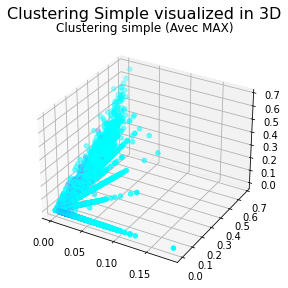

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


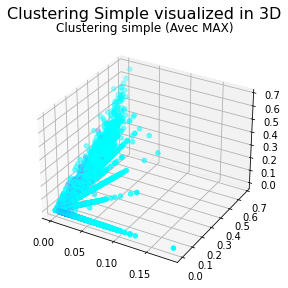

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


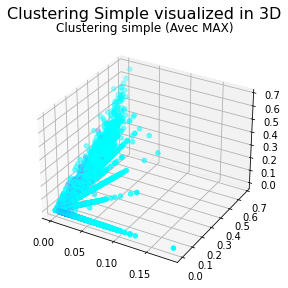

In [36]:
plot_clusters3D(reuters_max_3, reuters_labels, III_SIMPLE_CLUST_3D_K_PLUS_FREQ_PNG)
plot_clusters3D(reuters_max_3, reuters_labels, III_SIMPLE_CLUST_3D_K_PLUS_FREQ_JPG)
plot_clusters3D(reuters_max_3, reuters_labels, III_SIMPLE_CLUST_3D_K_PLUS_FREQ_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters3D"> plot_clusters3D</a> |</strong>

<h5>3D</h5>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


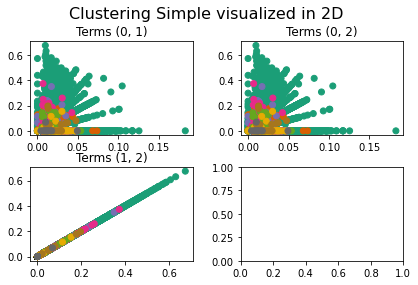

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


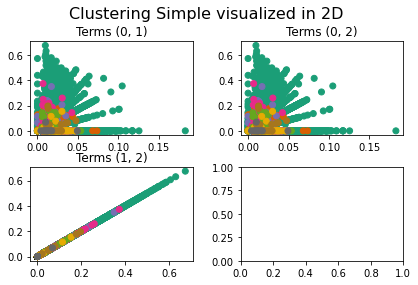

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


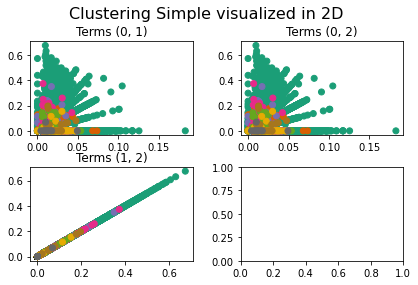

In [37]:
plot_clusters2D(reuters_max_3, reuters_labels, III_SIMPLE_CLUST_2D_K_PLUS_FREQ_PNG)
plot_clusters2D(reuters_max_3, reuters_labels, III_SIMPLE_CLUST_2D_K_PLUS_FREQ_JPG)
plot_clusters2D(reuters_max_3, reuters_labels, III_SIMPLE_CLUST_2D_K_PLUS_FREQ_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters2D"> plot_clusters2D</a> |</strong>

<hr>
<div style="display: flex;">
    <div style="margin: 10px;"><strong><a href="./II-Pré-traitemnt du dataset.ipynb">précédent</a></strong></div>
    <div style="margin: 10px;"><strong><a href="./IV-NMF.ipynb">suivant</a></strong></div>
</div>